**이름: 손민아**

## 1. seoul.csv 파일을 DataFrame으로 불러와서 각 변수들에 대해서 요약통계량을 구해보라.

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%matplotlib inline

font_list = [font.name for font in fm.fontManager.ttflist]
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')
# 한글 출력 시 (Colab 용)
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# plt.rc('font', family='NanumBarunGothic')

# 마이너스 기호 깨짐 현상 해결
# mpl.rcParams['axes.unicode_minus'] = False 

# 윈도우는 아래 참고
# https://m.blog.naver.com/itisik/221789012960

In [9]:
import pandas as pd
seoul = pd.read_csv('../data/seoul.csv', encoding='cp949')

In [10]:
seoul.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1908-01-01,108,-5.9,-9.1,-1.3
1,1908-01-02,108,-7.7,-13.9,-3.0
2,1908-01-03,108,-6.2,-10.8,-2.9
3,1908-01-04,108,-7.5,-12.8,-1.7
4,1908-01-05,108,-4.8,-11.3,-0.1


In [11]:
seoul.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,40843.0,40087.000000,40086.000000,40085.000000
mean,108.0,11.756452,7.464354,16.764014
std,0.0,10.655657,10.880051,10.980574
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.700000,-1.400000,7.200000
50%,108.0,13.000000,8.000000,18.600000
75%,108.0,21.200000,17.100000,26.300000
max,108.0,33.700000,30.300000,39.600000


## 2. ‘date’라는 datetime변수를 추가하고 ‘날짜’변수와 ‘지점’변수를 제거하라.

In [12]:
seoul['date']=pd.to_datetime(seoul['날짜'])
seoul = seoul.drop(columns=['날짜','지점'])

In [13]:
seoul.dtypes

평균기온(℃)           float64
최저기온(℃)           float64
최고기온(℃)           float64
date       datetime64[ns]
dtype: object

In [14]:
seoul.columns

Index(['평균기온(℃)', '최저기온(℃)', '최고기온(℃)', 'date'], dtype='object')

## 3.  ‘date’로부터 년도, 월, 요일에 해당하는 정보를 추출하여 ‘year’, ‘month’, ‘week’변수를 추가하라.

In [52]:
seoul['year'] = seoul.date.dt.year
seoul['month'] = seoul.date.dt.month
seoul['week'] = seoul.date.dt.dayofweek
seoul['week'] = seoul.week.replace({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})


## 4. ‘date’를 line index로 설정하라. 

In [16]:
seoul.index = seoul.date

In [53]:
seoul.head(5)

,평균기온(℃),최저기온(℃),최고기온(℃),date,year,month,week
date,,,,,,,
1908-01-01,-5.9,-9.1,-1.3,1908-01-01,1908,1,Wed
1908-01-02,-7.7,-13.9,-3.0,1908-01-02,1908,1,Thu
1908-01-03,-6.2,-10.8,-2.9,1908-01-03,1908,1,Fri
1908-01-04,-7.5,-12.8,-1.7,1908-01-04,1908,1,Sat
1908-01-05,-4.8,-11.3,-0.1,1908-01-05,1908,1,Sun


## 5. 1980년부터 2020년 사이의 ‘평균기온(℃)’의 연도별 최댓값을 선그래프로 작성하라. 

In [54]:
seoul.loc['1980':'2020']

,평균기온(℃),최저기온(℃),최고기온(℃),date,year,month,week
date,,,,,,,
1980-01-01,3.8,0.5,6.6,1980-01-01,1980,1,Tue
1980-01-02,4.7,3.5,5.9,1980-01-02,1980,1,Wed
1980-01-03,3.8,-0.5,6.2,1980-01-03,1980,1,Thu
1980-01-04,-3.2,-6.9,-0.5,1980-01-04,1980,1,Fri
1980-01-05,-5.3,-9.1,-1.0,1980-01-05,1980,1,Sat
...,...,...,...,...,...,...,...
2020-12-27,5.8,1.4,10.0,2020-12-27,2020,12,Sun
2020-12-28,6.7,4.2,11.4,2020-12-28,2020,12,Mon
2020-12-29,0.1,-6.2,4.3,2020-12-29,2020,12,Tue


Text(0, 0.5, '평균기온(℃)')

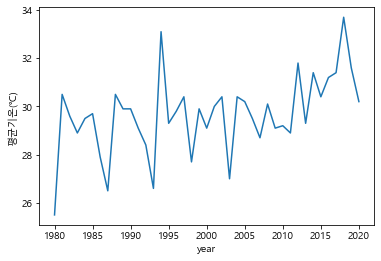

In [30]:
seoul.loc['1980':'2020'].groupby('year')['평균기온(℃)'].max().plot()
plt.ylabel('평균기온(℃)')

## 6. 전체기간에 대해 ‘최고기온(℃)’에 대한 히스토그램과 월별, 요일별 상자그림을 작성하라.

Text(0.5, 0, '기온(℃)')

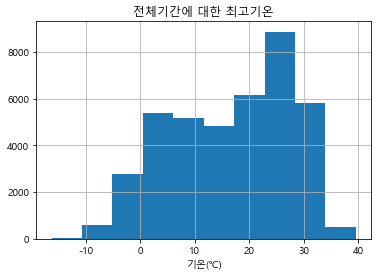

In [36]:
#히스토그램 최고기온
seoul['최고기온(℃)'].hist()
plt.title('전체기간에 대한 최고기온')
plt.xlabel('기온(℃)')

월별


Text(0.5, 0.98, '')

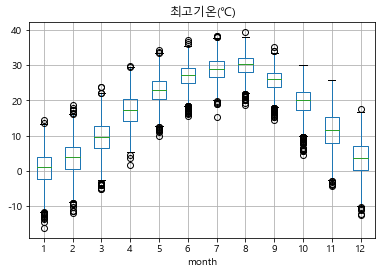

In [47]:
print("월별")
seoul.boxplot(column = ['최고기온(℃)'],by = 'month')
plt.suptitle('')

요일별


Text(0.5, 0.98, '')

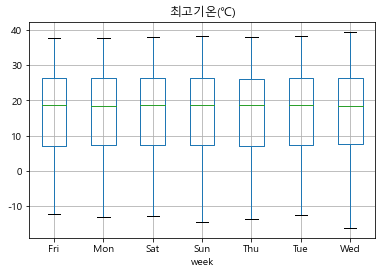

In [55]:
print("요일별")
seoul.boxplot(column=['최고기온(℃)'],by='week')
plt.suptitle('')